In [1]:
#importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
%matplotlib inline


In [2]:
#loading dataset
wine = pd.read_csv('wine.csv')

In [3]:
#lets check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.isnull().values.any()

False

In [5]:
#info abt the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


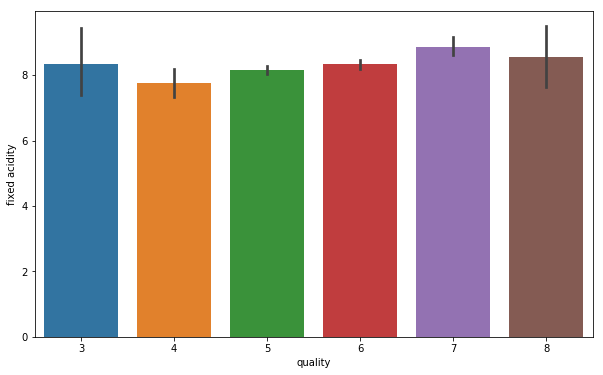

In [6]:
#here we see that fixed acidity doesnot give any specification to classify the quality
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='fixed acidity',data=wine)

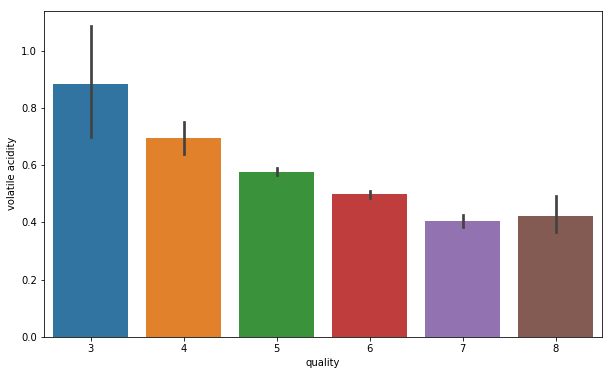

In [7]:
#here we see that its quite a downing trend in the volatile acidity as we go higher the quality
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='volatile acidity',data = wine)

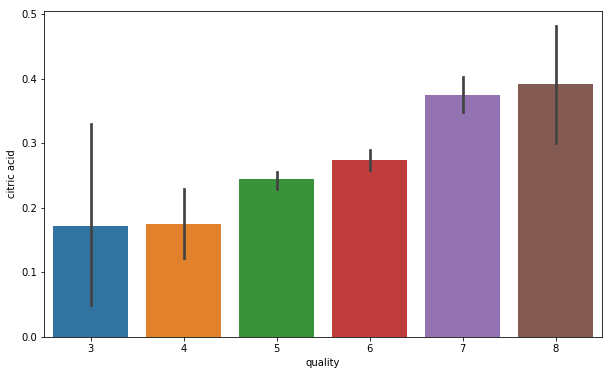

In [8]:
#composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='citric acid', data = wine)

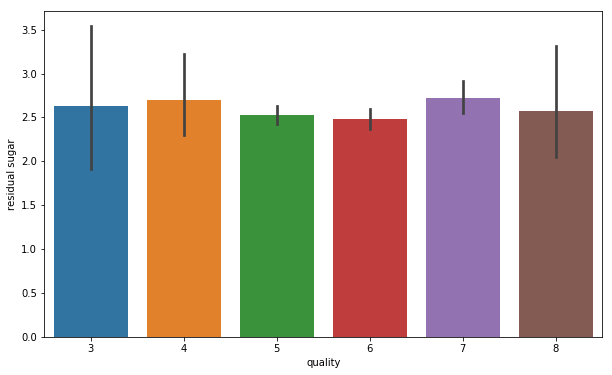

In [9]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='residual sugar', data = wine)

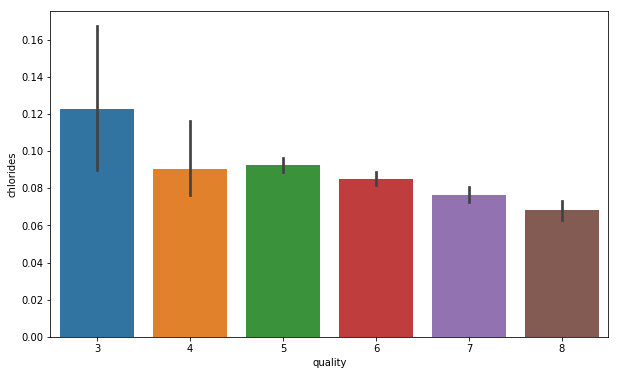

In [10]:
#composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='chlorides', data = wine)

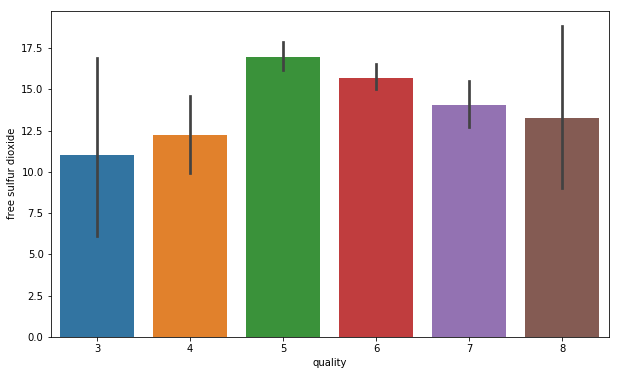

In [11]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='free sulfur dioxide', data = wine)

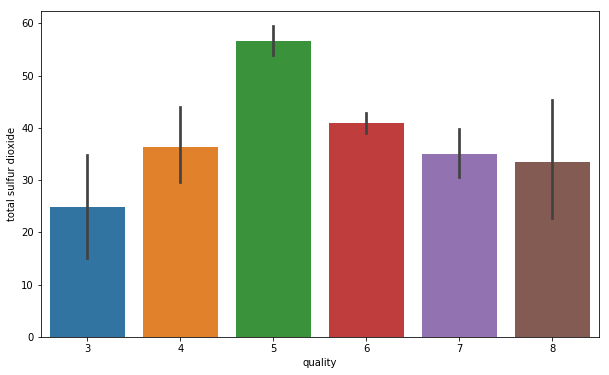

In [12]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='total sulfur dioxide', data = wine)

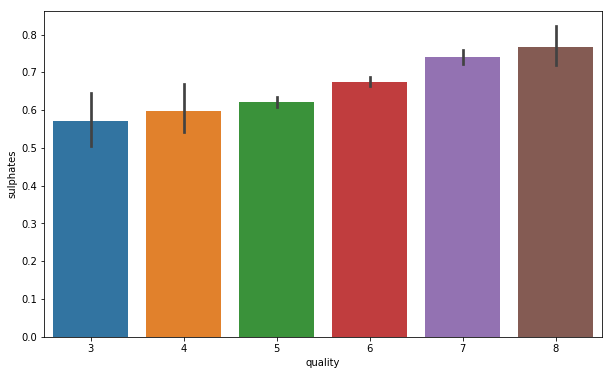

In [13]:
#sulphates level go higher with the quality of wine
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='sulphates', data = wine)

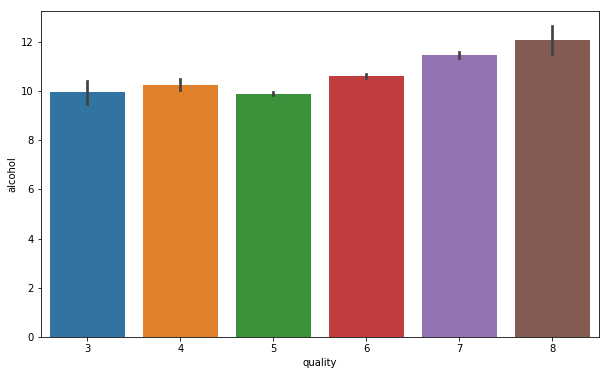

In [14]:
#alcohol level also goes higher as the quality of wine increases
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='alcohol', data = wine)

# preprocessing data for performing machine learning algorithm

In [15]:
#making binary classification for the response variable
#dividing wine as good as bad by giving the limit for the quality
bins = (2,6.5,8)
group_names=['bad','good']
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names)

In [16]:
#now lets assign a label to our quality variable
label_quality = LabelEncoder()

In [17]:
#bad becomes 0 and good becomes 1
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [18]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

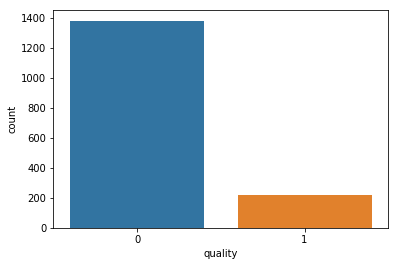

In [19]:
sns.countplot(wine['quality'])

In [20]:
#now seperate the dataset as response variable and feature variables
X = wine.drop('quality', axis = 1)
Y = wine['quality']

In [21]:
#train and test splitting of data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [22]:
#applying standard scaling to get optimized result
sc = StandardScaler()

In [23]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# our training and testing data is ready now ready now to perform machine learning algorithm

## random forest  classifier

In [24]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train,Y_train)
pred_rfc = rfc.predict(X_test)

In [25]:
#lets see how our model preformed
print(classification_report(Y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.63      0.36      0.46        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.76      0.66      0.69       320
weighted avg       0.86      0.88      0.86       320



### so random forest gives the accuracy upto 87% 

In [26]:
#confusion matrix for the random forest classification
print(confusion_matrix(Y_test,pred_rfc))

[[263  10]
 [ 30  17]]


## stochastic gradient decent classifier

In [27]:
sgd = SGDClassifier(penalty = None)
sgd.fit(X_train,Y_train)
pred_sgd = sgd.predict(X_test)

C:\Users\yasha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [28]:
print(classification_report(Y_test,pred_sgd))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       273
           1       0.43      0.45      0.44        47

   micro avg       0.83      0.83      0.83       320
   macro avg       0.67      0.67      0.67       320
weighted avg       0.83      0.83      0.83       320



### and stochastic gradient decent classifier gives accuracy of 84%

In [29]:
print(confusion_matrix(Y_test,pred_sgd))

[[245  28]
 [ 26  21]]


## svc

In [30]:
svc = SVC()
svc.fit(X_train,Y_train)
pred_svc = svc.predict(X_test)

In [31]:
print(classification_report(Y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



### also svc gives an accuracy of 86%

In [32]:
print(confusion_matrix(Y_test,pred_svc))

[[268   5]
 [ 35  12]]


# lets try to increase our accuracy of models 

## grid search cv 

In [33]:
#finding best parameters for our svc model
param={'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],'kernel':['linear','rbf'],'gamma':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [34]:
grid_svc.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [35]:
#best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [36]:
#lets run our SVC again with the best parameters 
svc2 = SVC(C=1.2, gamma = 0.9, kernel = 'rbf')
svc2.fit(X_train, Y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(Y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

   micro avg       0.90      0.90      0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



### svc improves from 86% to 90% using grid search cv

# cross validation score for random forest and sgd

In [37]:
#now lets try to do some evaluation for random forest model using cross validation
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = Y_train, cv = 10)
rfc_eval.mean()

0.9109005905511811

### random forest accuracy increases from 87% to 91% using cross validation